# K-NN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Loading some example data
digits = datasets.load_digits()
X, y = digits.data, digits.target

X_train_val_digits, X_test_digits, y_train_val_digits, y_test_digits = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_digits, X_val_digits, y_train_digits, y_val_digits = train_test_split(X_train_val_digits, y_train_val_digits, test_size=0.25, random_state=42)

#Classfication

In [3]:
def predict(X_train, y_train, X_test, k):
    """
    Predicts labels for given test data X_test using k-nearest neighbors.

    Parameters:
    - X_train: Training data
    - y_train: taget(label) for training data
    - X_test: Test data for which predictions are to be made
    - k: Number of nearest neighbors to consider

    Returns:
    - y_pred: Predicted labels for X_test
    """

    num_test = X_test.shape[0]
    num_train = X_train.shape[0]

    # Compute the Euclidean distance using a vectorized formula.
    d1 = -2 * np.dot(X_test, X_train.T)
    d2 = np.sum(np.square(X_test), axis=1, keepdims=True)
    d3 = np.sum(np.square(X_train), axis=1)
    dist = np.sqrt(d1 + d2 + d3)

    # Initialize an array to store predictions.
    y_pred = np.zeros(num_test)

    # For each test sample...
    for i in range(num_test):
        # Find the indices of the k smallest distances.
        dist_k_min = np.argsort(dist[i])[:k]

        # Get the labels of the k nearest training samples.
        y_kclose = y_train[dist_k_min]

        # Predict the most frequent label among them.
        y_pred[i] = np.argmax(np.bincount(y_kclose.tolist()))

    return y_pred

In [ ]:
acc = []
for k in range(1, 21):
    y_pred = predict(X_train_digits, y_train_digits, X_val_digits, k)
    accuracy = np.mean(y_pred == y_val_digits)
    acc.append(accuracy)
acc

[0.9888888888888889,
 0.9916666666666667,
 0.9944444444444445,
 0.9888888888888889,
 0.9888888888888889,
 0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112,
 0.9805555555555555,
 0.9833333333333333,
 0.9777777777777777,
 0.975,
 0.9777777777777777,
 0.975,
 0.975,
 0.9805555555555555,
 0.9722222222222222,
 0.9666666666666667,
 0.9583333333333334,
 0.9611111111111111]

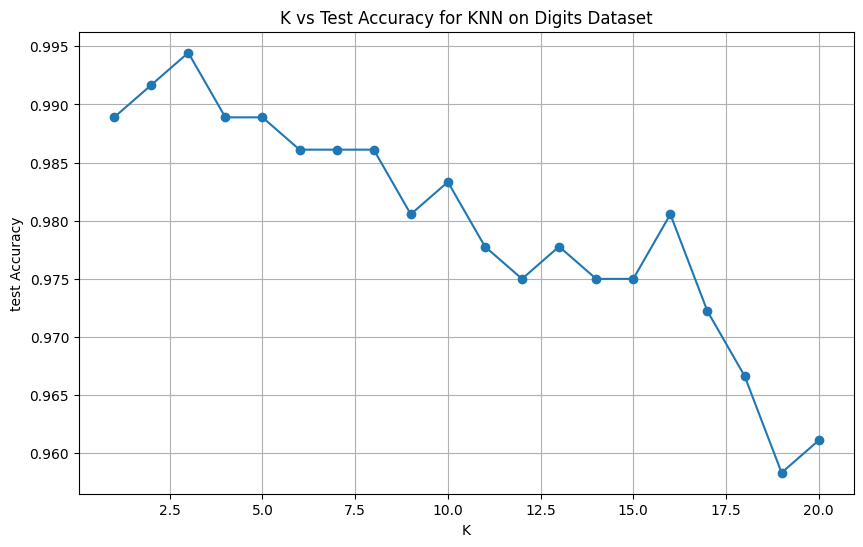

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), acc, marker='o')
plt.title("K vs Test Accuracy for KNN on Digits Dataset")
plt.xlabel("K")
plt.ylabel("test Accuracy")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# make prediciton
y_pred_digits = predict(X_train_digits, y_train_digits, X_test_digits, 3)

# calcualte the accuary score
accuracy = accuracy_score(y_test_digits, y_pred_digits)
print(f"Accuracy: {accuracy:.10f}")

Accuracy: 0.9833333333


#Regression

Best k: 11
Test RMSE: 0.6454856499480218


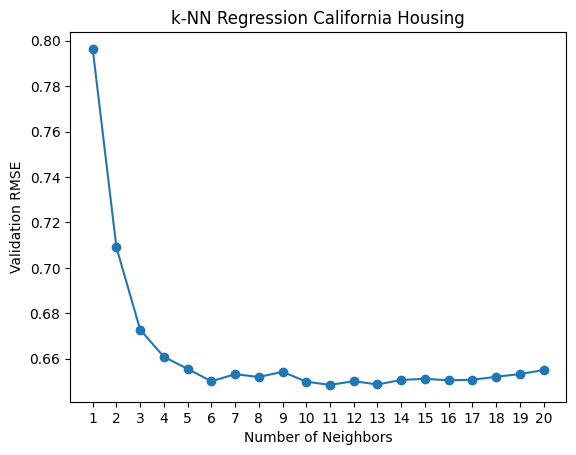

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

#Loading the Dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

#Splitting the Dataset
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

#Data Normalization
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

#Defining the k-NN Regression Function
def knn_regression_predict(X_train, y_train, x_query, k):
    distances = np.sqrt(((X_train - x_query) ** 2).sum(axis=1))
    k_nearest_neighbors = np.argsort(distances)[:k]
    average_value = np.mean(y_train[k_nearest_neighbors])
    return average_value

k_values = range(1, 21)
validation_rmse_values = []

for k in k_values:

    predictions_val = [knn_regression_predict(X_train, y_train, x_query, k) for x_query in X_val]
    rmse_val = np.sqrt(((predictions_val - y_val) ** 2).mean())
    validation_rmse_values.append(rmse_val)

best_k = k_values[np.argmin(validation_rmse_values)]

predictions_test = [knn_regression_predict(X_train, y_train, x_query, best_k) for x_query in X_test]
rmse_test = np.sqrt(((predictions_test - y_test) ** 2).mean())

print(f"Best k: {best_k}")
print(f"Test RMSE: {rmse_test}")

plt.plot(k_values, validation_rmse_values, marker='o')
plt.title('k-NN Regression California Housing')
plt.xlabel('Number of Neighbors')
plt.ylabel('Validation RMSE')
plt.xticks(range(1, 21))
plt.show()


In [ ]:
validation_rmse_values

[0.7963509261332864,
 0.7089784220295428,
 0.672796841528116,
 0.6608648453764684,
 0.6555528033818513,
 0.6500832569464895,
 0.6532162311402966,
 0.6519955460123371,
 0.6542629919520255,
 0.6499266842633691,
 0.6484865110587887,
 0.6501417990339615,
 0.6486790471816686,
 0.6506990624381085,
 0.6511515004099119,
 0.6505393158054504,
 0.6507491422594809,
 0.6520736868407547,
 0.6532685689931862,
 0.6550251651937871]

# CV

### Classification

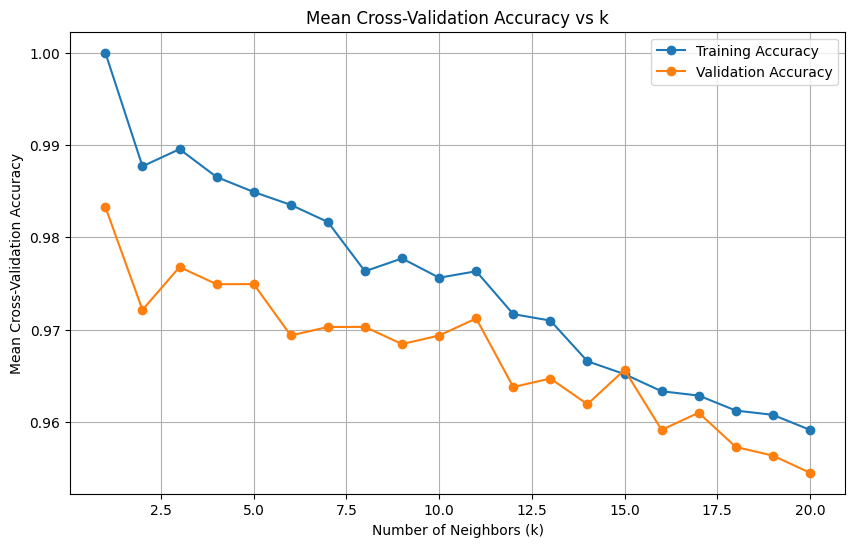

[0.9832902670111971,
 0.9721447028423771,
 0.9767829457364341,
 0.974922480620155,
 0.9749354005167958,
 0.9693669250645994,
 0.9702885443583117,
 0.9702971576227389,
 0.9684366925064598,
 0.9693626184323858,
 0.9712144702842377,
 0.9637812230835486,
 0.9647071490094745,
 0.9619207579672695,
 0.9656416881998278,
 0.9591429801894918,
 0.9609991386735572,
 0.95729112833764,
 0.9563565891472867,
 0.9545004306632213]

In [ ]:
#For classification
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 21))
cv_train_accuracy = []
cv_valid_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train_digits, y_train_digits, return_train_score=True)
    cv_train_accuracy.append(scores['train_score'].mean())
    cv_valid_accuracy.append(scores['test_score'].mean())

max_train = max(cv_train_accuracy)
max_valid = max(cv_valid_accuracy)
max_train_k = cv_train_accuracy.index(max_train) + 1
max_valid_k = cv_valid_accuracy.index(max_valid) + 1

plt.figure(figsize=(10,6))
plt.plot(k_values, cv_train_accuracy, marker='o', label='Training Accuracy')
plt.plot(k_values, cv_valid_accuracy, marker='o', label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Mean Cross-Validation Accuracy vs k')
plt.legend()
plt.grid(True)
plt.show()

cv_valid_accuracy

In [ ]:
#Testing the result
knn_ckassifier = KNeighborsClassifier(n_neighbors=11)
knn_ckassifier.fit(X_train_digits, y_train_digits)
predict = knn_ckassifier.predict(X_test_digits)
accuracy = np.mean(predict == y_test_digits)
print(accuracy)

0.975


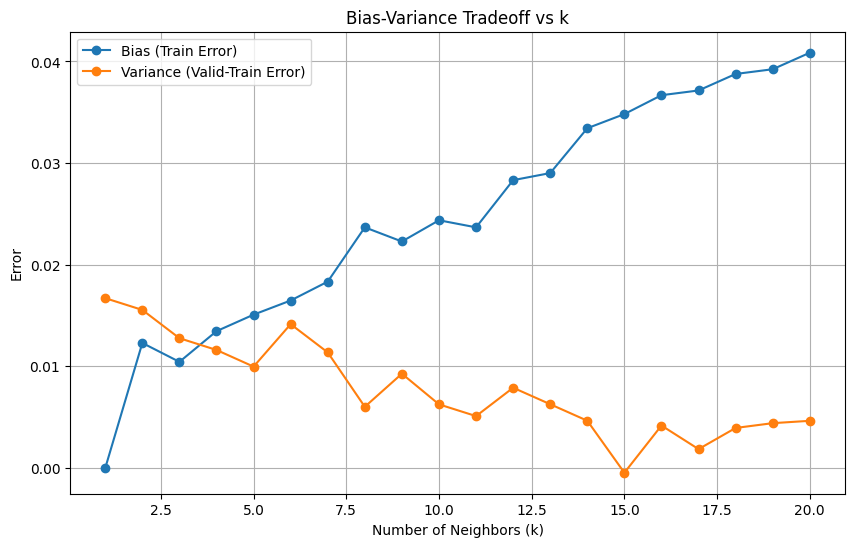

In [ ]:
k_values = list(range(1, 21))
cv_train_error = []
cv_valid_error = []

# Perform cross-validation for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train_digits, y_train_digits, return_train_score=True)
    cv_train_error.append(1 - scores['train_score'].mean())  # error = 1 - accuracy
    cv_valid_error.append(1 - scores['test_score'].mean())

# Calculate bias and variance proxies
estimated_bias = cv_train_error
estimated_variance = [valid - train for valid, train in zip(cv_valid_error, cv_train_error)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, estimated_bias, marker='o', label='Bias (Train Error)')
plt.plot(k_values, estimated_variance, marker='o', label='Variance (Valid-Train Error)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff vs k')
plt.legend()
plt.grid(True)
plt.show()

### Regression

The lowest training cross-validation RMSE is -0.0 when k = 1
The lowest validation cross-validation RMSE is 0.6428084076514768 when k = 11


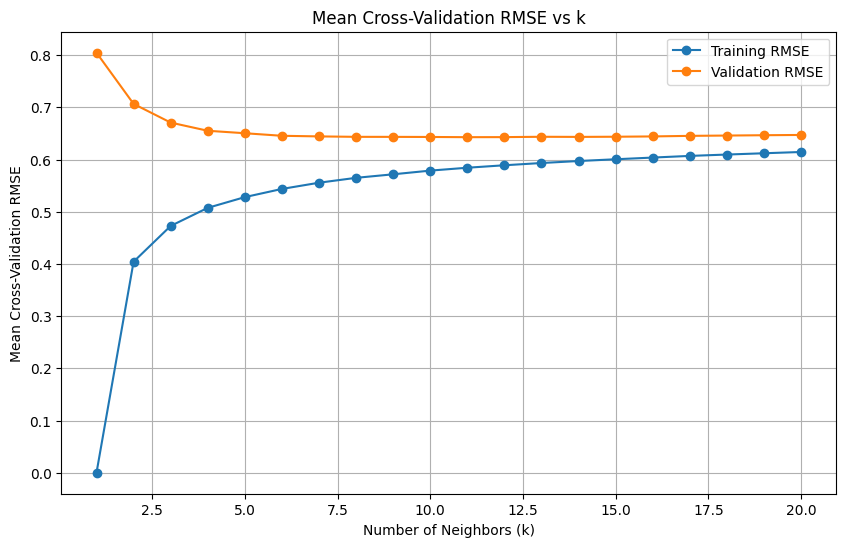

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor

k_values = list(range(1, 21))
cv_train_rmse = []
cv_valid_rmse = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)
    train_rmse = np.sqrt(-scores['train_score'].mean())
    valid_rmse = np.sqrt(-scores['test_score'].mean())
    cv_train_rmse.append(train_rmse)
    cv_valid_rmse.append(valid_rmse)

min_train_rmse = min(cv_train_rmse)
min_valid_rmse = min(cv_valid_rmse)
min_train_k = cv_train_rmse.index(min_train_rmse) + 1
min_valid_k = cv_valid_rmse.index(min_valid_rmse) + 1

print(f"The lowest training cross-validation RMSE is {str(min_train_rmse)} when k = {str(min_train_k)}")
print(f"The lowest validation cross-validation RMSE is {str(min_valid_rmse)} when k = {str(min_valid_k)}")

plt.figure(figsize=(10,6))
plt.plot(k_values, cv_train_rmse, marker='o', label='Training RMSE')
plt.plot(k_values, cv_valid_rmse, marker='o', label='Validation RMSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation RMSE')
plt.title('Mean Cross-Validation RMSE vs k')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Testing the result
knn_regressor = KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(X_train, y_train)
predict = knn_regressor.predict(X_test)
rmse = np.sqrt(((predict - y_test) ** 2).mean())
print(rmse)

0.6454856499480218


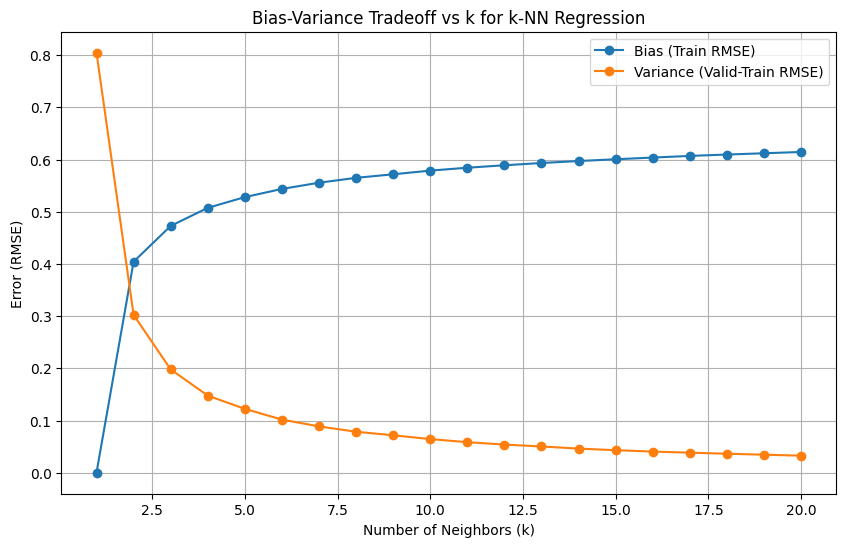

In [ ]:
# Calculate bias and variance proxies
estimated_bias = cv_train_rmse
estimated_variance = [valid - train for valid, train in zip(cv_valid_rmse, cv_train_rmse)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, estimated_bias, marker='o', label='Bias (Train RMSE)')
plt.plot(k_values, estimated_variance, marker='o', label='Variance (Valid-Train RMSE)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error (RMSE)')
plt.title('Bias-Variance Tradeoff vs k for k-NN Regression')
plt.legend()
plt.grid(True)
plt.show()